# Quantitative Analysis: A Case Study

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

# Loading and exploring the dataset

We're going to use pandas to load and explore our dataset.
We are using a dataset from [Statso](https://statso.io/quantitative-analysis-case-study/)


In [3]:
stocks_data = pd.read_csv("/content/stocks.csv")

In [4]:
stocks_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [5]:
stocks_data.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [10]:
stocks_data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [27]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


Our dataset contains the following columns:

1. Ticker: The stock ticker symbol.
2. Date: The specific trading date.
3. Open: Opening price of the stock for the day.
4. High: Highest price point of the stock during the day.
5. Low: Lowest price point during the day.
6. Close: Closing price of the stock.
7. Adj Close: Adjusted closing price, factoring in corporate actions like splits.
8. Volume: Total trading volume of the stock.

We are going to perform our **quantitative analysis** using some statistical concepts like:

1. Descriptive Statistics: Summary statistics (man, median, standard deviation, etc.) for each stock.
2. Time Series Analysis: Trends and patterns over time, espcially for closing prices.
3. Volatility Analysis: How much the stock price fluctuates over a period.
4. Correlation Analysis: How stock prices of different companies are related to each other.
5. Comparative Analysis: comparing the performance of different stocks.
6. Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.


## Descriptive Statistics

Descriptive Statistics will provide summary statistics for each stock in the dataset.

In [7]:
descriptive_stats = stocks_data.groupby('Ticker')['Close'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


Let's understand:

AAPL (Apple Inc.)
* Count: 62.0 (The number of observations or trading days included in the dataset for AAPL)
* Mean: 158.24 (The average closing price)
* Standard Deviation: 7.36 (Measures the amount of variation or dispersion of closing prices)
* Minimum: 145.31 (The lowest closing price in the dataset)
* 25th Percentile: 152.08 (25% of the closing prices are below this value)
* Median (50%): 158.06 (The middle value of the closing prices)
* 75th Percentile: 165.16 (75% of the closing prices are below this value)
* Maximum: 173.57 (The highest closing price in the dataset)

# Time Series Analysis

Now we'll proceed with the Time Series Analysis to examine trends and patterns over time

In [15]:
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date', columns='Ticker', values='Close')

In [16]:
pivot_data

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,154.649994,108.040001,267.559998,362.950012
2023-02-08,151.919998,100.000000,266.730011,366.829987
2023-02-09,150.869995,95.459999,263.619995,362.500000
2023-02-10,151.009995,94.860001,263.100006,347.359985
2023-02-13,153.850006,95.000000,271.320007,358.570007
...,...,...,...,...
2023-05-01,169.589996,107.709999,305.559998,324.119995
2023-05-02,168.539993,105.980003,305.410004,317.549988
2023-05-03,167.449997,106.120003,304.399994,319.299988


In [20]:
# Creating a subplot

fig = make_subplots(rows=1, cols=1)

for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

fig.show();

We have got a plot which displays  the time series of the closing prices for each stock(AAPL, GOOG, MSFT, NFLX) over the observed period.

We can point some key observations:

1. Trend
2. Volatility
3. Comparative performance

# Volatility Analysis

We can calculate and compare the volatility (std deviation) of the closing prices for each stock. It will provide us an insight into how much the stock price fluctuated over the period.

In [23]:
volatility = pivot_data.std().sort_values(ascending=False)
print(volatility)
fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

fig.show()

Ticker
NFLX    18.554419
MSFT    17.676231
AAPL     7.360485
GOOG     6.279464
dtype: float64


1. NFLX: Highest volatility with a standard deviation of approximately 18.55.
2. MSFT: Next highest, with a standard deviation of around 17.68.
3. AAPL: Lower volatility compared to NFLX and MSFT, with a standard deviation of about 7.36.
4. GOOG: The least volatile in this set, with a standard deviation of approximately 6.28.

# Correlation Analysis

We'll perform a Correlation Analysis to understand how the stock prices are related to each other.

In [24]:
correlation_matrix = pivot_data.corr()

In [28]:
fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

# Show the figure
fig.show()

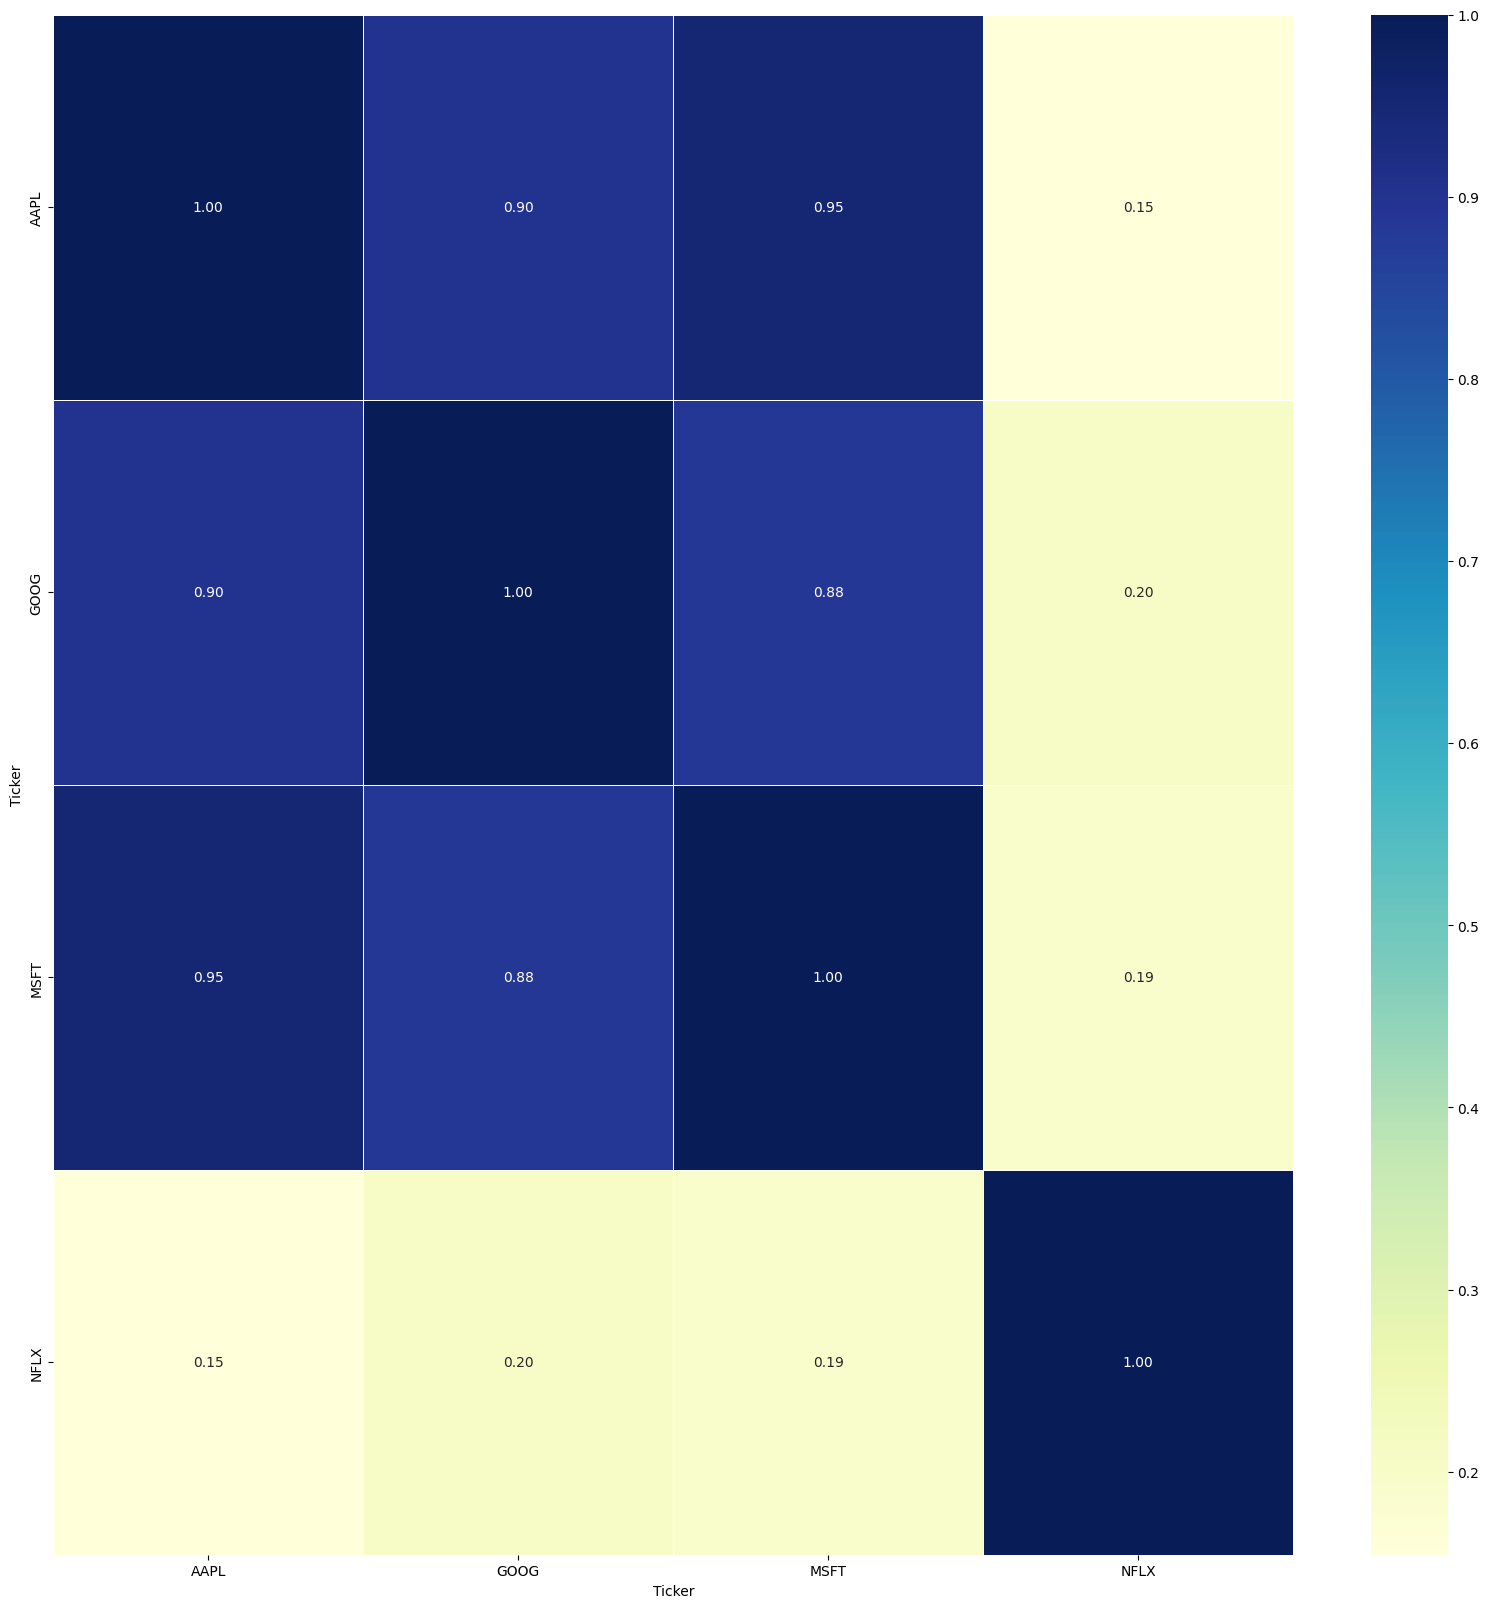

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

* Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
* Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
* Values around 0 indicate a lack of correlation.

# Comparative Analysis

In this step, we'll compare the performance of different stocks based on their returns over the period.

In [30]:
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100


fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

* MSFT: The highest positive change of approximately 16.10%.
* AAPL: Exhibited a positive change of approximately 12.23%. It indicates a solid performance, though slightly lower than MSFT’s.
* GOOG: Showed a slight negative change of about -1.69%. It indicates a minor decline in its stock price over the observed period.
* NFLX: Experienced the most significant negative change, at approximately -11.07%. It suggests a notable decrease in its stock price during the period.


# Daily Risk Vs. Return Analysis

Now we'll calculate a Risk vs. Return Analysis.
To perform this we will calculate the avarage daily return and the standard deviation of daily returns for each stock.

In [31]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()

* AAPL: Stands out for its low risk profile and positive average daily return. This suggests a more stable investment option with consistent growth potential.

* GOOG: Compared to AAPL, it exhibits higher volatility with a slightly negative average daily return during the analyzed period. This translates to a riskier investment with potentially lower returns.

* MSFT: Offers a balance between risk and reward. It demonstrates moderate risk with the highest average daily return. While potentially more rewarding than AAPL, it also carries greater volatility.

* NFLX: Carries the highest risk among the analyzed stocks. It also has a negative average daily return, making it the most volatile and least profitable investment during this timeframe.

# In Conclusion

This use case project leveraged Python's robust data analysis capabilities to conduct a comprehensive quantitative analysis of various stocks. We employed a multi-faceted approach:

* Descriptive Statistics: Provided a foundational understanding of each stock's central tendency (mean, median) and variability (standard deviation) through summary statistics.
* Time Series Analysis: Unveiled trends and patterns in closing prices over time, aiding in identifying potential investment opportunities.
* Volatility Analysis: Quantified the price fluctuations of each stock, allowing us to assess risk associated with each investment.
* Correlation Analysis: Exposed the relationships between different stock prices, providing insights into portfolio diversification strategies.
* Comparative Analysis: Enabled a detailed comparison of various stocks' performance metrics, fostering well-informed investment decisions.
* Risk-Return Trade-off Analysis: We delved into the crucial balance between potential risk and reward for each stock, empowering the construction of a risk-adjusted portfolio.